In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import seaborn as sns


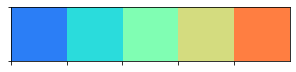

In [2]:
colors = sns.color_palette(palette = 'rainbow',n_colors=5)
sns.palplot(colors)

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


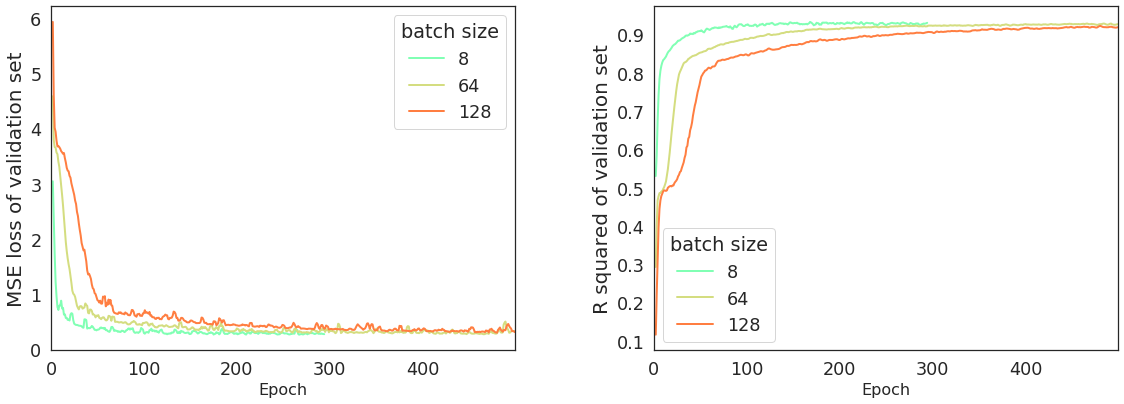

In [16]:
task_name = 'ESOL'
batch_sizes, res = load('./%s.x1.res' % task_name)

sns.set(style = 'white', font_scale = 1.6)
fig, axes = plt.subplots(ncols=2,figsize=(16,6))


for item, ax in zip(['val_loss', 'val_r2'], axes):
#     l_16 = sum(pd.DataFrame(res[0])['process'])/3
#     l_64 = sum(pd.DataFrame(res[1])['process'])/3
#     l_128 = sum(pd.DataFrame(res[2])['process'])/3
    
    l_16 = pd.DataFrame(res[0])['process'].iloc[1]
    l_64 = pd.DataFrame(res[1])['process'].iloc[1]
    l_128 = pd.DataFrame(res[2])['process'].iloc[1]
    
    
    l16 = l_16[item].to_frame(name = '8')
    l64 = l_64[item].to_frame(name = '64')
    l128 = l_128[item].to_frame(name = '128')

    df = pd.concat([ l16, l64, l128], axis=1)
    df.columns.name = 'batch size'
    
    df.iloc[:500].rolling(3).apply(np.mean).plot(colors = colors[-3:], lw = 2, ax = ax)
    
    if item == 'val_loss':
        item = 'MSE loss of validation set'
    else:
        item = 'R squared of validation set'
        
    ax.set_ylabel(item, fontsize = 20)
    ax.set_xlabel('Epoch', fontsize = 16)   

    
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

fig.savefig( 'val_%s.svg' % task_name, dpi=300, format='svg')

In [4]:
dfr = pd.concat([pd.DataFrame(a) for a in res])
dfr = dfr[['batch_size',  'valid_rmse', 'valid_r2', 'test_rmse','test_r2']]
dfr = dfr.set_index('batch_size')

In [5]:
app = []
for i in dfr.columns:
    df1 = dfr[i].to_frame(name = 'value')
    df1['metric'] = i
    app.append(df1)

In [6]:
dfapp = pd.concat(app).reset_index()
dfapp.batch_size = dfapp.batch_size.astype(str)
df1 = dfapp[dfapp.metric.isin(['valid_rmse', 'test_rmse'])]
df2 = dfapp[dfapp.metric.isin(['valid_r2', 'test_r2'])]
df1.metric = df1.metric.map({'valid_rmse': 'valid_best_rmse', 'test_rmse': 'test_rmse'})
df2.metric = df2.metric.map({'valid_r2': 'valid_best_r2', 'test_r2': 'test_r2'})

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


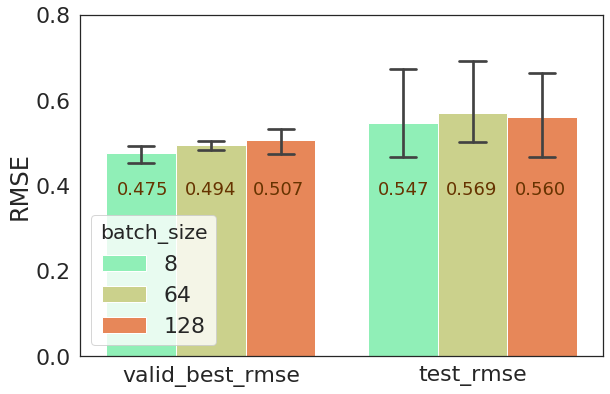

In [17]:
sns.set(style = 'white', font_scale = 2)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharex=False, sharey=False, )
ax1 = axes      
g1 = sns.barplot(x = 'metric',y = 'value',data = df1, hue ='batch_size', ax=ax1,
            hue_order=['8', '64', '128'], palette=colors.as_hex()[-3:], capsize = 0.1,
           )
ax1.set_ylabel('RMSE')
ax1.set_xlabel('')
ax1.set_ylim(0.0, 0.8)


fontdict = {'fontsize':18, "color": "#663300"}
#[0.475, 0.494, 0.507, 0.547, 0.569, 0.56]
g1.text(-0.36, 0.38, '0.475', fontdict = fontdict) 
g1.text(-0.10, 0.38, '0.494', fontdict = fontdict) 
g1.text(0.16, 0.38, '0.507', fontdict = fontdict) 

g1.text(1-0.36, 0.38, '0.547', fontdict = fontdict) 
g1.text(1-0.10, 0.38, '0.569', fontdict = fontdict) 
g1.text(1+0.16, 0.38, '0.560', fontdict = fontdict) 


fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
fig.savefig( '1_val_test_bar_%s.svg' % task_name, format='svg')

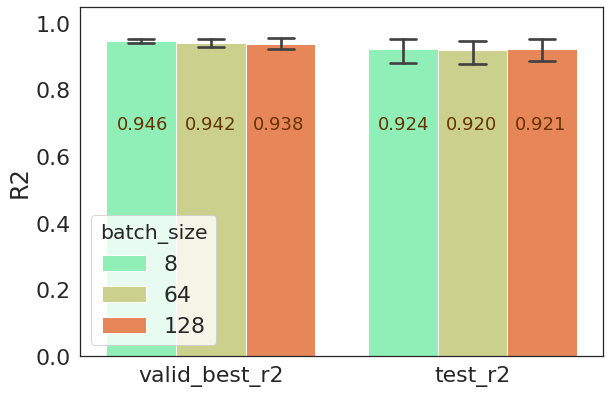

In [18]:
sns.set(style = 'white', font_scale = 2)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,6), sharex=False, sharey=False, )
ax2 = axes     
g2 = sns.barplot(x = 'metric',y = 'value',data = df2, hue ='batch_size', ax=ax2,
            hue_order=['8', '64', '128'], palette=colors.as_hex()[-3:], capsize = 0.1,
           )

ax2.set_ylabel('R2')
ax2.set_xlabel('')
ax2.set_ylim(0.0, 1.05)

#[0.946, 0.942, 0.938, 0.924, 0.92, 0.921]
g2.text(-0.36, 0.68, '0.946', fontdict = fontdict) 
g2.text(-0.10, 0.68, '0.942', fontdict = fontdict) 
g2.text(0.16, 0.68, '0.938', fontdict = fontdict) 

g2.text(1-0.36, 0.68, '0.924', fontdict = fontdict) 
g2.text(1-0.10, 0.68, '0.920', fontdict = fontdict) 
g2.text(1+0.16, 0.68, '0.921', fontdict = fontdict) 


fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
fig.savefig( '2_val_test_bar_%s.svg' % task_name, format='svg')


In [9]:
df1.groupby(['metric','batch_size'])[['value']].apply(np.mean).sort_index(ascending = False).round(3)['value'].tolist()

[0.475, 0.494, 0.507, 0.547, 0.569, 0.56]

In [10]:
df2.groupby(['metric','batch_size'])[['value']].apply(np.mean).sort_index(ascending = False).round(3)['value'].tolist()

[0.946, 0.942, 0.938, 0.924, 0.92, 0.921]

In [11]:
pd.DataFrame(res[0])

,batch_size,process,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2
0,8,loss val_loss rmse val_rmse ...,0.271599,0.480124,0.465616,0.982937,0.954038,0.953536
1,8,loss val_loss rmse val_rmse ...,0.209844,0.493457,0.502200,0.990964,0.935222,0.938124
2,8,loss val_loss rmse val_rmse ...,0.291945,0.452888,0.672062,0.982063,0.949286,0.880547


In [12]:
pd.DataFrame(res[1])

,batch_size,process,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2
0,64,loss val_loss rmse val_rmse...,0.217901,0.482190,0.502261,0.988990,0.953361,0.946012
1,64,loss val_loss rmse val_rmse...,0.286695,0.514792,0.515038,0.982378,0.929828,0.935602
2,64,loss val_loss rmse val_rmse...,0.357209,0.485214,0.690280,0.978200,0.942513,0.878886


In [13]:
pd.DataFrame(res[2])

,batch_size,process,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2
0,128,loss val_loss rmse val_rms...,0.318678,0.474189,0.466979,0.976617,0.955083,0.952808
1,128,loss val_loss rmse val_rmse...,0.390667,0.532584,0.550578,0.967180,0.924187,0.925368
2,128,loss val_loss rmse val_rmse...,0.402722,0.513418,0.663443,0.967206,0.934374,0.885772
